# Analysis of the Attacks on diva

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
from pathlib import Path
import os
import sys
import bz2
import pickle
np.random.seed(10)
# adds the visibility of the mlem module, needed to load the attack models
sys.path.append("../../../..") 
sys.path.append("../../")
import mlem
from mlem.ensemble import HardVotingClassifier, SoftVotingClassifier
import mynbutils as mu
from mlem.utilities import (load_pickle_bz2)

Blackbox data

In [2]:
BLACK_BOX_PATH = './BB_DATA/diva_rf_noclustering.bz2'
BLACK_BOX_DATA_PATH = './BB_DATA/diva_rf_noclustering_data_nsamples_5.npz'
TRAIN_SET_CSV = 'BB_DATA/train.csv'
TEST_SET_CSV  = 'BB_DATA/test.csv'
NOISY_VALIDATION_SET_CSV = 'BB_DATA/validation_noisy.csv'
CENTROIDS_NEIGHBORS = 'BB_DATA/clusters_representatives_quantiles_5_40.csv'

loading the data and the black box

In [3]:
black_box = load_pickle_bz2(BLACK_BOX_PATH)
black_box

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=100,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=150)

In [4]:
loaded = np.load(BLACK_BOX_DATA_PATH, allow_pickle=True)
for k in loaded.keys():
    print(k, end=" ")
print(f"loaded from {BLACK_BOX_DATA_PATH}")

x_train x_test y_train y_test x_test_clustered y_test_clustered loaded from ./BB_DATA/diva_rf_noclustering_data_nsamples_5.npz


In [5]:
x_train = loaded["x_train"]
x_test = loaded["x_test"]
y_train = loaded["y_train"]
y_test = loaded["y_test"]
x_test_clustered = loaded["x_test_clustered"]
y_test_clustered = loaded["y_test_clustered"]

In [6]:
diva_train = pd.read_csv(TRAIN_SET_CSV)
diva_test  = pd.read_csv(TEST_SET_CSV)
print(f"Loaded train and test sets from:\n{TRAIN_SET_CSV}\n{TEST_SET_CSV}")

Loaded train and test sets from:
BB_DATA/train.csv
BB_DATA/test.csv


# Dataset Generated with LIME + OVERSAMPLING 

In [7]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/DIVA_OVERSAMPLING_GENERATED_DATASET/gaussian/gaussian"

### Attack with the Hard Voting Classifier

#even = 0 IN - 0 OUT
Lime-Generated data plus oversampling | HardVoting
              precision    recall  f1-score   support

          in       0.71      0.96      0.82      6624
         out       0.49      0.10      0.16      2839

    accuracy                           0.70      9463
   macro avg       0.60      0.53      0.49      9463
weighted avg       0.64      0.70      0.62      9463



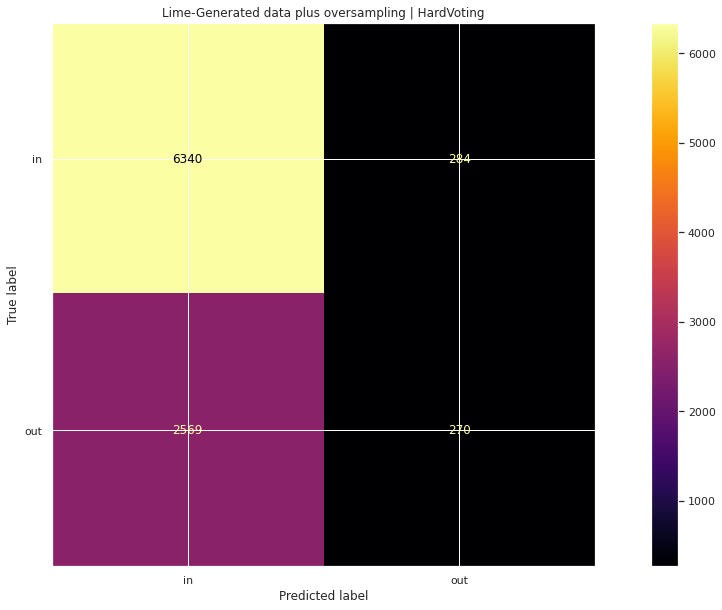

In [8]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(diva_train, diva_test, ensemble_0, ensemble_1, black_box, "Lime-Generated data plus oversampling | HardVoting")

# Attack dataset created by selecting the elements from the noisy set which where close to the centroids of the lime neighborhood

## No oversampling right after creation (on diva left 2000+)

In [9]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/DIVA_CENTROIDS_LIME_NO_OVERSAMPLING_AFTER_PICKING/gaussian/same"

/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#even = 1 IN - 0 OUT
Noisy elem. close to centroids | HardVoting
              precision    recall  f1-score   support

          in       0.71      0.96      0.82      6623
         out       0.48      0.10      0.16      2839

    accuracy                           0.70      9462
   macro avg       0.59      0.53      0.49      9462
weighted avg       0.64      0.70      0.62      9462



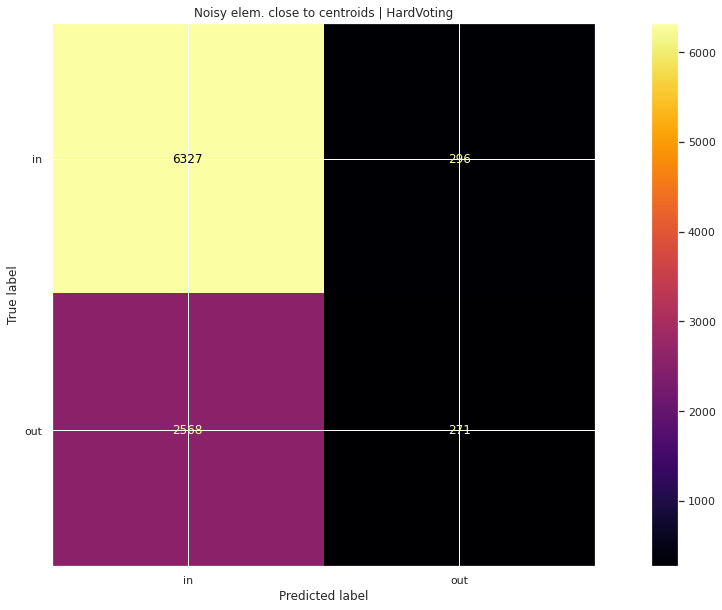

In [10]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(diva_train, diva_test, ensemble_0, ensemble_1, black_box, "Noisy elem. close to centroids | HardVoting")

## With oversampling right after creation (bringing the proportion to 50/50)
> TODO: Questo esperimento è da rifare (provare con un valore ancora più piccolo di k_centroids in SMOTE)

In [11]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/DIVA_CENTROIDS_LIME_WITH_OVERSAMPLING_AFTER_PICKING/gaussian/same"

ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

FileNotFoundError: [Errno 2] No such file or directory: '/home/gerardozinno/Desktop/ExperimentsResult/DIVA_CENTROIDS_LIME_WITH_OVERSAMPLING_AFTER_PICKING/gaussian/same/35/attack/0/model.pkl.bz2'

In [ ]:
mu.evaluate_attack(diva_train, diva_test, ensemble_0, ensemble_1, black_box, "Noisy elem. close to centroids | HardVoting")

## With oversampling on the attack dataset

> Ora ho passato l'attack dataset a SMOTE, ma il dataset conteneva delle probabilità.

> TODO: Controllare se SMOTE in questo caso genera anch'esso delle probabilità. Altrimenti posso fare l'oversampling su una sola colonna
>       ed eventualmente creare l'altra come $1-\text{valori generati da SMOTE}$ 

In [12]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/12_AGO/DIVA_CENTROIDS_LIME_WITH_OVERSAMPLING_AFTER_PICKING_AND_ATTACK_OVERS/gaussian/same/"

/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#even = 60 IN - 27 OUT
Noisy elem. close to centroids + overs + overs on attack dataset | HardVoting
              precision    recall  f1-score   support

          in       0.71      0.94      0.81      6564
         out       0.45      0.11      0.18      2812

    accuracy                           0.69      9376
   macro avg       0.58      0.53      0.49      9376
weighted avg       0.63      0.69      0.62      9376



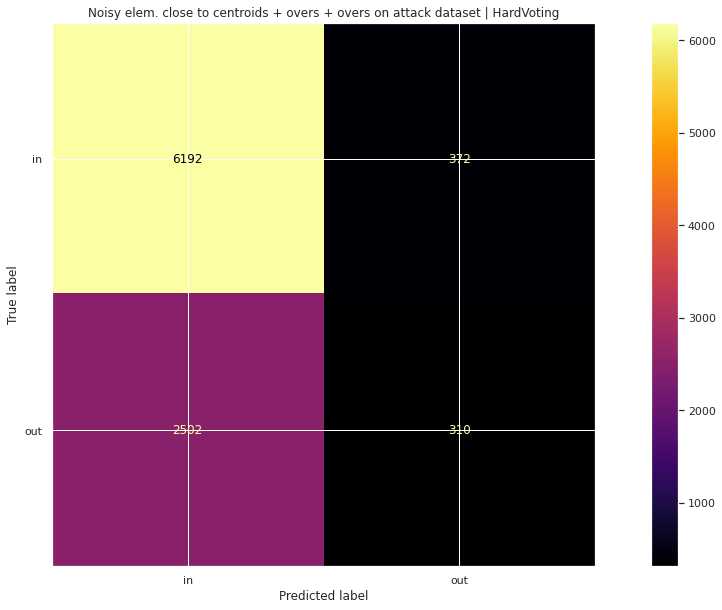

In [13]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(diva_train, diva_test, ensemble_0, ensemble_1, black_box, "Noisy elem. close to centroids + overs + overs on attack dataset | HardVoting")

# Dataset Generated With the Gaussian Mixtures

### Without gridsearch on the number of components n_components = 3

In [14]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/DIVA_STATISTICAL_NO_OVERSAMPLING_AFTER_GEN/gaussian/same"

/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#even = 0 IN - 0 OUT
Statistical no overs, no grid | HardVoting | HardVoting
              precision    recall  f1-score   support

          in       0.71      0.96      0.82      6624
         out       0.49      0.10      0.16      2839

    accuracy                           0.70      9463
   macro avg       0.60      0.53      0.49      9463
weighted avg       0.64      0.70      0.62      9463



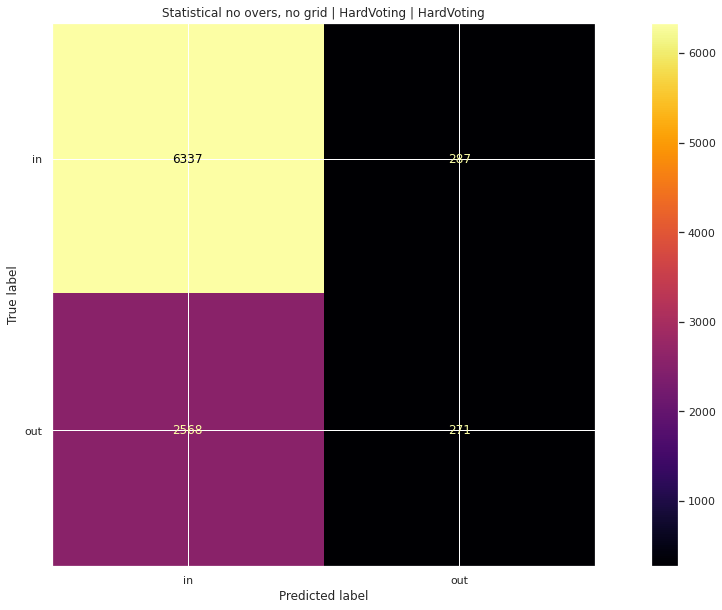

In [15]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(diva_train, diva_test, ensemble_0, ensemble_1, black_box, "Statistical no overs, no grid | HardVoting | HardVoting")

# Dataset Generated With the Gaussian Mixtures with gridsearch for n_components and oversampling of the attack dataset

In [16]:
EXPERIMENTS_RESULTS_FOLDER = "/home/gerardozinno/Desktop/ExperimentsResult/12_AGO/DIVA_STATISTICAL_OVERSAMPLING_AFTER_GEN_AND_ATTACK_OVERS/gaussian/same/"

/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/gerardozinno/.pyenv/versions/ml-environment/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#even = 9 IN - 6 OUT
Statistical with oversampling, grid search, attack dataset oversampling | HardVoting
              precision    recall  f1-score   support

          in       0.71      0.95      0.82      6615
         out       0.48      0.10      0.17      2833

    accuracy                           0.70      9448
   macro avg       0.59      0.53      0.49      9448
weighted avg       0.64      0.70      0.62      9448



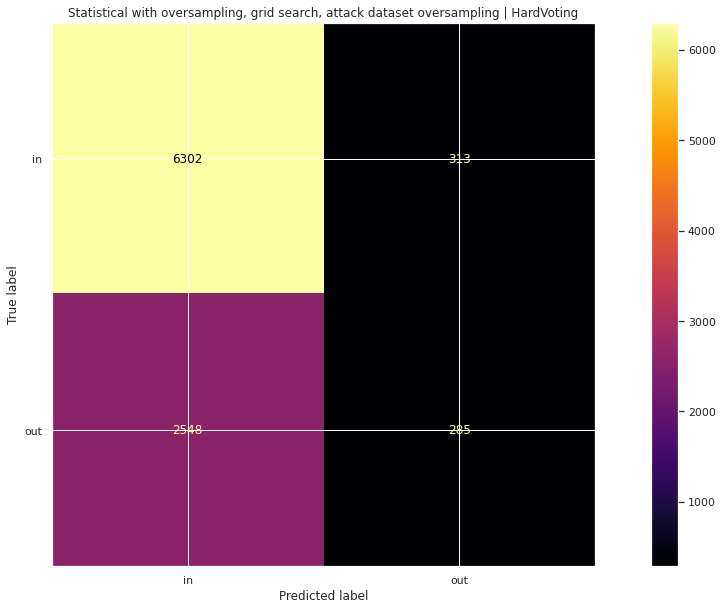

In [17]:
ensemble_0, ensemble_1 = mu.create_ensembles(EXPERIMENTS_RESULTS_FOLDER, HardVotingClassifier)

mu.evaluate_attack(diva_train, diva_test, ensemble_0, ensemble_1, black_box, "Statistical with oversampling, grid search, attack dataset oversampling | HardVoting")